<a href="https://colab.research.google.com/github/AliKon11/---/blob/main/PythonLesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання данних

In [112]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
response = requests.get("https://uadata.net/work-positions/cities.json?о=Київ")
data_json = response.json()

Створення DataFrame

In [114]:
df = pd.DataFrame(data_json["data"])

In [115]:
df.head()

,at,val
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [116]:
df.shape

(387, 2)

In [117]:
df.columns

Index(['at', 'val'], dtype='object')

In [118]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка данних

In [119]:
df["at"] = pd.to_datetime(df["at"])

In [120]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [121]:
df = df.rename(columns= {"at": "Дата", "val": "Вакансії"})

In [122]:
df.head()

,Дата,Вакансії
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [123]:
df.set_index('Дата', inplace=True)

Побудова графіків

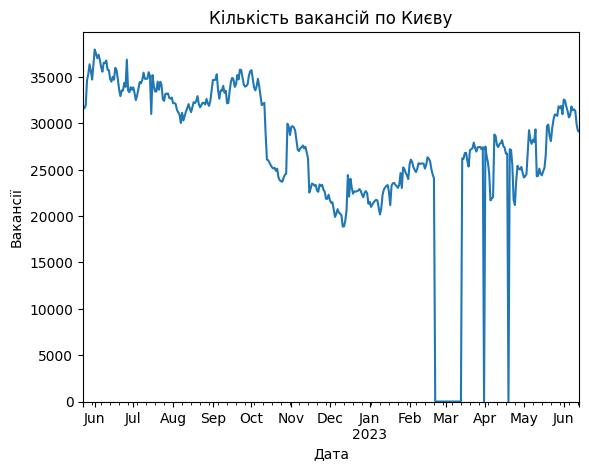

In [124]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [125]:
df["Вакансії"] = df['Вакансії'].replace(0,np.nan)
df['Вакансії'] = df["Вакансії"].interpolate()


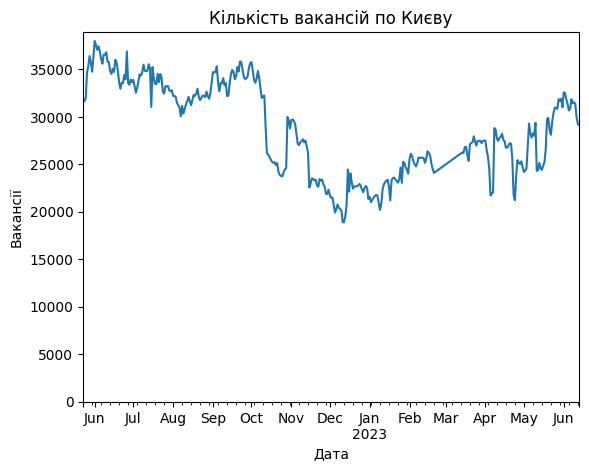

In [126]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [127]:
from pandas.core import window
df['rollingmean'] = df['Вакансії'].rolling(window=7).mean()

In [128]:
df

,Вакансії,rollingmean
Дата,,
2022-05-23,31876.0,NaN
2022-05-24,31626.0,NaN
2022-05-25,31928.0,NaN
2022-05-26,34621.0,NaN
2022-05-27,35312.0,NaN
...,...,...
2023-06-09,31507.0,31340.000000
2023-06-10,31335.0,31270.857143
2023-06-11,29922.0,31070.714286


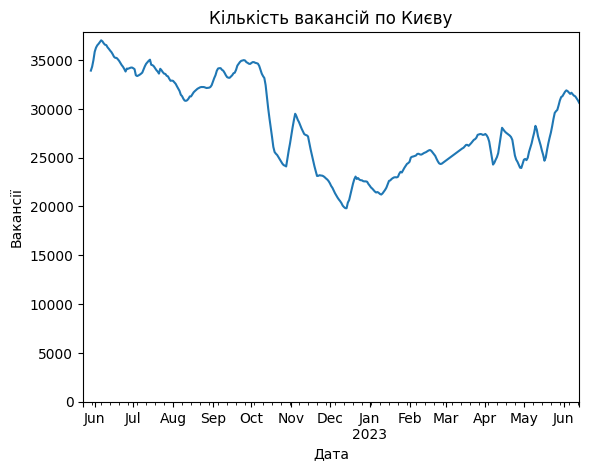

In [129]:
df["rollingmean"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [130]:
df.describe()

,Вакансії,rollingmean
count,387.000000,381.000000
mean,28449.512920,28403.834833
std,4798.153844,4703.391439
min,18872.000000,19806.428571
25%,24500.500000,24708.571429
50%,27475.000000,27322.571429
75%,32857.000000,33310.571429
max,37961.000000,37013.714286


Друга частина

In [158]:
response = requests.get('https://uadata.net/work-positions/cities.json?o=Дніпро')
data_json = response.json()

In [159]:
df_dnipro = df = pd.DataFrame(data_json['data'])

In [160]:
df_dnipro.head()

,at,val
0,2022-05-23,702
1,2022-05-24,726
2,2022-05-25,715
3,2022-05-26,742
4,2022-05-27,768


In [161]:
df_dnipro["at"] = pd.to_datetime(df_dnipro["at"])
df_dnipro= df_dnipro.rename(columns= {"at": "Дата", "val": "Вакансії"})
df_dnipro.set_index('Дата', inplace=True)
df_dnipro["Вакансії"] = df_dnipro['Вакансії'].replace(0,np.nan)
df_dnipro['Вакансії'] = df_dnipro["Вакансії"].interpolate()
df_dnipro['rollingmean'] = df_dnipro['Вакансії'].rolling(window=7).mean()

In [162]:
response = requests.get('https://uadata.net/work-positions/cities.json?o=Тернопіль')
data_json = response.json()

In [163]:
df_ternopil = df = pd.DataFrame(data_json['data'])

In [168]:
df_ternopil.head()

,Вакансії,rollingmean
Дата,,
2022-05-23,153.0,NaN
2022-05-24,173.0,NaN
2022-05-25,185.0,NaN
2022-05-26,191.0,NaN
2022-05-27,193.0,NaN


In [172]:
df_ternopil

,Вакансії,rollingmean
Дата,,
2022-05-23,153.0,NaN
2022-05-24,173.0,NaN
2022-05-25,185.0,NaN
2022-05-26,191.0,NaN
2022-05-27,193.0,NaN
...,...,...
2023-06-09,373.0,365.142857
2023-06-10,371.0,366.428571
2023-06-11,346.0,363.857143


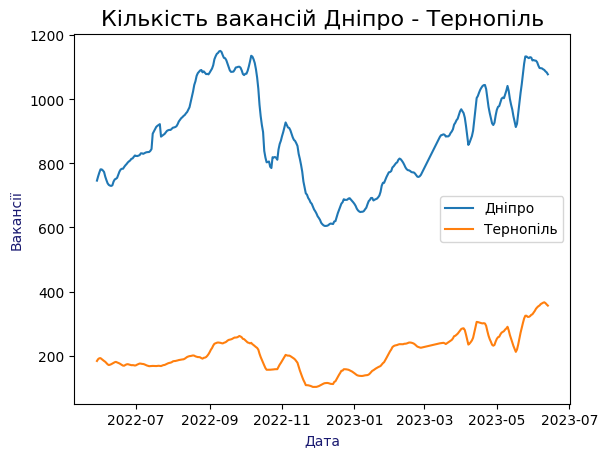

In [176]:
fi, axs = plt.subplots()
axs.plot(df_dnipro.index, df_dnipro['rollingmean'], label="Дніпро")
axs.plot(df_ternopil.index, df_ternopil['rollingmean'], label="Тернопіль")
plt.title("Кількість вакансій Дніпро - Тернопіль", fontsize=16)
plt.xlabel('Дата', color= 'midnightblue')
plt.ylabel('Вакансії', color= 'midnightblue')
plt.legend()
plt.show()